In [1]:
#say no to warnings!
import warnings
warnings.filterwarnings("ignore")
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.preprocessing.image import \
    ImageDataGenerator,load_img,array_to_img,img_to_array
from tensorflow.keras.applications import resnet50,ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# DATASET

In [3]:
train_datagen = ImageDataGenerator(\
    preprocessing_function=resnet50.preprocess_input)

In [4]:
xtrain,ytrain = train_datagen.\
    flow_from_directory('food_or_not/training/',
        target_size=(224,224),batch_size=3000).next()

Found 3000 images belonging to 2 classes.


In [5]:
xtrain.shape

(3000, 224, 224, 3)

In [6]:
test_datagen = ImageDataGenerator(\
    preprocessing_function=resnet50.preprocess_input)

In [7]:
xtest,ytest = test_datagen.\
    flow_from_directory('food_or_not/testing/',
        target_size=(224,224),batch_size=3000).next()

Found 1000 images belonging to 2 classes.


In [8]:
xtest.shape

(1000, 224, 224, 3)

# MODEL

In [9]:
base_model = ResNet50(weights='imagenet',include_top=False)

In [10]:
x = base_model.output
compact = GlobalAveragePooling2D()(x)

In [11]:
extraction_model = Model(inputs=base_model.input, outputs=compact)

In [12]:
feat_train = extraction_model.predict(xtrain)

In [13]:
feat_train.shape

(3000, 2048)

In [14]:
feat_test = extraction_model.predict(xtest)
feat_test.shape

(1000, 2048)

# TRAINING

In [15]:
ytrain = np.argmax(ytrain,axis=1)
ytest = np.argmax(ytest,axis=1)

In [16]:
logreg = LogisticRegression()
logreg.fit(feat_train,ytrain)

LogisticRegression()

In [17]:
print('train accuracy',logreg.score(feat_train,ytrain))
print('test accuracy',logreg.score(feat_test,ytest))

train accuracy 1.0
test accuracy 0.985


# VISUALIZZAZIONE

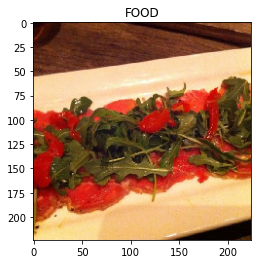

In [18]:
path = 'food_or_not/testing/food/319.jpg'
img = load_img(path,target_size=(224,224))
plt.imshow(img)
prepr = resnet50.preprocess_input(img_to_array(img))
feats = extraction_model(np.expand_dims(prepr,0))
classif = logreg.predict(feats)[0]
plt.title(['FOOD','NO FOOD'][classif]);

In [19]:
def load_and_predict(path):
    img = load_img(path,target_size=(224,224))
    prepr = resnet50.preprocess_input(img_to_array(img))
    feats = extraction_model(np.expand_dims(prepr,0))
    classif = logreg.predict(feats)[0]
    return ['FOOD','NO FOOD'][classif]

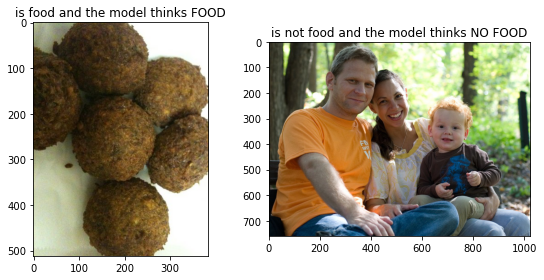

In [20]:
plt.figure(figsize=(8,4))
strngs = ['FOOD','NO FOOD']
plt.subplot(1,2,1)
food_fname = np.random.choice(\
        os.listdir('food_or_not/testing/food/'))
foor_fpath = 'food_or_not/testing/food/'+food_fname
plt.imshow(load_img(foor_fpath))
plt.title('is food and the model thinks '+\
                      load_and_predict(foor_fpath))
plt.subplot(1,2,2)
nofood_fname = np.random.choice(\
        os.listdir('food_or_not/testing/non_food/'))
nofood_fpath = 'food_or_not/testing/non_food/'+nofood_fname
plt.imshow(load_img(nofood_fpath))
plt.title('is not food and the model thinks '+\
    load_and_predict(nofood_fpath))
plt.tight_layout();